In [5]:
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
import keras

In [ ]:
x = np.load('features.npy', allow_pickle=True)
y = np.load('labels.npy', allow_pickle=True)
print(x.shape)
print(y.shape)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.33, shuffle=True)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

In [ ]:
x_train = x_train/255
x_test = x_test/255

In [ ]:
model = keras.models.Sequential([
    keras.layers.InputLayer((200,200,3)) 
])

model.add(keras.layers.Conv2D(16, (3,3), activation = 'relu'))
model.add(keras.layers.MaxPool2D())
model.add(keras.layers.Conv2D(16, (3,3), activation='relu'))
model.add(keras.layers.MaxPool2D())
model.add(keras.layers.Conv2D(32, (3,3), activation = 'relu'))
model.add(keras.layers.MaxPool2D())
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPool2D())
model.add(keras.layers.Conv2D(64, (3,3), activation = 'relu'))
model.add(keras.layers.MaxPool2D())
model.add(keras.layers.Conv2D(64, (3,3), activation='relu'))
model.add(keras.layers.MaxPool2D())
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(512, activation='relu'))
model.add(keras.layers.Dropout(0.2))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(4, activation='relu'))
model.add(keras.layers.Dropout(0.2))

model.add(keras.layers.Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 198, 198, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 99, 99, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 97, 97, 16)     │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 48, 48, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 46, 46, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 21, 21, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 10, 10, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 2, 2, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 1, 1, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1, 1, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │        33,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │        32,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │           260 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 138,457 (540.85 KB)

 Trainable params: 138,457 (540.85 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss=keras.losses.BinaryCrossentropy(), metrics=['accuracy'], optimizer='adam')
callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience= 3)

In [ ]:
history = model.fit(x_train, y_train, epochs=50, validation_split=0.2, callbacks=callback)

Epoch 1/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 17s 111ms/step - accuracy: 0.5550 - loss: 0.6759 - val_accuracy: 0.7888 - val_loss: 0.5009
Epoch 2/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 11s 87ms/step - accuracy: 0.7745 - loss: 0.4972 - val_accuracy: 0.8350 - val_loss: 0.4326
Epoch 3/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 10s 78ms/step - accuracy: 0.8396 - loss: 0.4165 - val_accuracy: 0.8939 - val_loss: 0.2826
Epoch 4/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 10s 76ms/step - accuracy: 0.8536 - loss: 0.3716 - val_accuracy: 0.9116 - val_loss: 0.2290
Epoch 5/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 10s 75ms/step - accuracy: 0.9106 - loss: 0.2757 - val_accuracy: 0.9273 - val_loss: 0.1970
Epoch 6/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 10s 75ms/step - accuracy: 0.9177 - loss: 0.2490 - val_accuracy: 0.9489 - val_loss: 0.1523
Epoch 7/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 10s 76ms/step - accuracy: 0.9383 - loss: 0.1997 - val_accuracy: 0.9509 - val_loss: 0.1343
Epoch 8/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 10s 76ms/step - accuracy: 0.9425 - loss: 0.1794 -

In [ ]:
model.evaluate(x_test, y_test)

79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.9704 - loss: 0.1062


[0.10389672964811325, 0.9712803959846497]

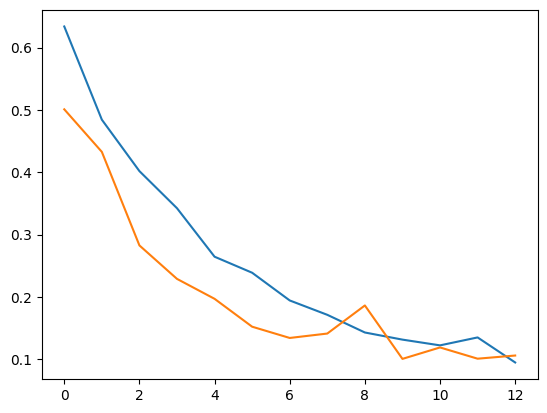

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

In [ ]:
# model.save('new_model.keras')
# model.save('new_model.h5')